In [1]:
import sys; sys.path.insert(0, '..')

import gym
import sys
import torch
import tester
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import scipy
from scipy import sparse
from scipy.sparse import linalg
from pytorch_drl.utils.exploration import *
from pytorch_drl.utils.schedule import *
from pytorch_drl.utils.math import *
from pytorch_drl.utils.model_utils import *
from pytorch_drl.models.rainbow_models import DQNNetwork

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def plot(scores):
    clear_output(True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode')
    plt.show()

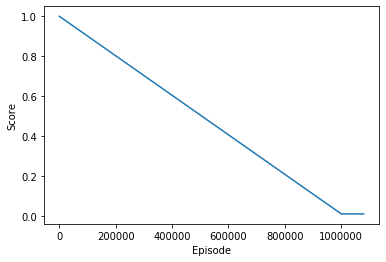

In [3]:
s1 = LinearSchedule(1.0, 0.01, 10e5)
plot([s1.step() for _ in range(int(10e5)+80000)])

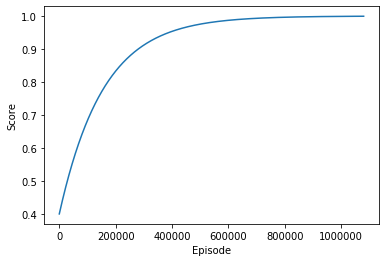

In [4]:
s1 = ExpSchedule(0.4, 1.0, 10e2)
plot([s1.step() for _ in range(int(10e2)+80)])
s1 = ExpSchedule(0.4, 1.0, 10e5)
plot([s1.step() for _ in range(int(10e5)+80000)])

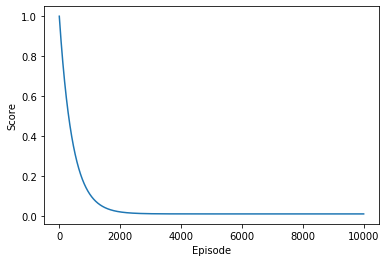

In [5]:
s1 = ExpSchedule(1, 0.01, 3000)
a2 = [s1.step() for _ in range(10000)]
plot(a2)

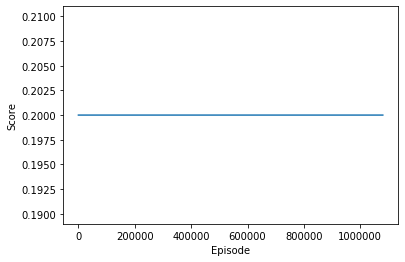

In [6]:
s1 = LinearSchedule(0.2, 0.2, 123)
plot([s1.step() for _ in range(int(10e5)+80000)])

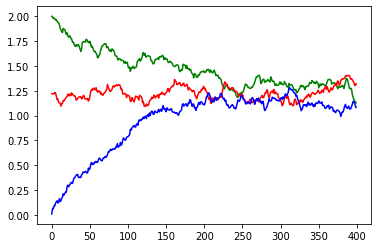

In [7]:
"""
μ = 1.2, σ = 0.3:
blue: initial value a = 0 (a.s.)
green: initial value a = 2 (a.s.)
red: initial value normally distributed so that the process has invariant measure

https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process
"""

num_steps = 2e2
x_size=np.array([0.]).shape
ou_proc1 = OrnsteinUhlenbeck(x_size=x_size, mu=1.2, theta=1)
ou_proc2 = OrnsteinUhlenbeck(x_size=x_size, mu=1.2, theta=1)
ou_proc3 = OrnsteinUhlenbeck(x_size=x_size, mu=1.2, theta=1)

m = num_steps + num_steps/1
x1 = np.array([2.])
ou_proc1.set(x1)

path = [ou_proc1.step() for _ in range(int(m))]

x2 = np.array([1.2])
ou_proc2.set(x2)
path2 = [ou_proc2.step() for _ in range(int(m))]


x3 = np.array([0.])
ou_proc3.set(x3)
path3 = [ou_proc3.step() for _ in range(int(m))]

plt.plot(np.arange(int(m)), path, color='g')
plt.plot(np.arange(int(m)), path2, color='r')
plt.plot(np.arange(int(m)), path3, color='b')

### Exploration with annealing std

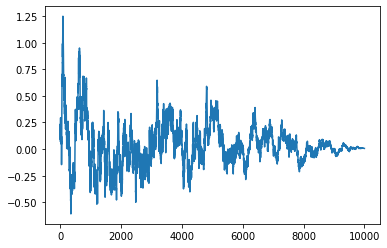

In [8]:
cs = 10
num_steps = 1e4
x_size=np.array([0.]).shape

ou_proc1 = OrnsteinUhlenbeck(x_size=x_size, mu=0, theta=1,
                            sigma_init=0.5, sigma_final=0.001, sigma_horizon=1e4)

path = [ou_proc1.step() for _ in range(int(num_steps))]
plt.plot(np.arange(int(num_steps)), path)

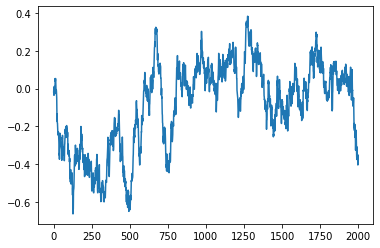

In [9]:
cs = 10
num_steps = 2e3
x_size=np.array([0.]).shape

ou_proc1 = OrnsteinUhlenbeck(x_size=x_size, mu=0, theta=1,
                            sigma_init=0.3, sigma_final=0.3, sigma_horizon=1)

path = [ou_proc1.step() for _ in range(int(num_steps))]
plt.plot(np.arange(int(num_steps)), path)

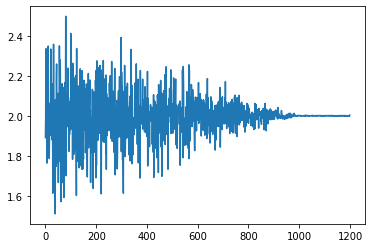

In [10]:
x_size=np.array([0.]).shape
g_proc = Gaussian(x_size, mu=2., sigma_init=0.2, sigma_final=0.001, sigma_horizon=1000)
num_steps = 1000*1.2
path = [g_proc.step() for _ in range(int(num_steps))]
plt.plot(np.arange(int(num_steps)), path)

In [11]:
N = 100
B = 64
net = DQNNetwork(N, N)
inp = torch.rand([B, N])
target = torch.rand([B, N])
NS = torch.cat([p.view(-1) for p in net.parameters()]).shape[0]
rando = torch.rand([NS])